In [1]:
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Esercizio 3

Write a Python program that optimizes the Griewank Problem through two evolutionary algorithms: a genetic algorithm and the differential evolution.

$$ f(\mathbf{x}) = f(x_1, x_2, \ldots, x_n) = 1 + \sum_{i=0}^{n-1} \frac{x_i^2}{4000} - \prod_{i=0}^{n-1} cos\left(\frac{x_i}{\sqrt{i}}\right)$$

In [2]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [3]:
IND_SIZE=10
TOURN_SIZE = 3

toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: random.uniform(-600,600))
#individuals
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE) 
#population
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#Operators
#Crossover
toolbox.register('mate', tools.cxTwoPoint)
#Mutation
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
#Selection
toolbox.register('select', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('select_r', tools.selRoulette)

In [4]:
#Evaluate function
def evaluate(individual):
    sommatoria = 0
    produttoria = 1
    for i in individual:
        cos = np.cos(i/(individual.index(i)+1))
        sommatoria += i**2
        produttoria = produttoria * cos
    return 1+sommatoria/4000-produttoria
        

toolbox.register('evaluate', evaluate)

#Statistical Features
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [5]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, ev_limit, stats):
    evaluation_no = 0
    while evaluation_no<=ev_limit:
        #Defininf Hall of Fame
        hof = tools.HallOfFame(1)
    
        #Creating the population
    
        pop = toolbox.population(n=POP_SIZE)
        #print(pop)

        #Defining the Logbook
        logbook = tools.Logbook()
        logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])
    
    

        #Evaluate the entire population
        fitness = list(map(toolbox.evaluate, pop))
        print(fitness)
        for ind, fit in zip(pop, fitness):
            ind.fitness.values = [fit]
            evaluation_no += 1


        hof.update(pop) if stats else {}

        record = stats.compile(pop) if stats else {}
        logbook.record(gen=0, nevals=len(pop), **record)
    

        for g in range(NGEN):
            #print('Generation Number ', g, 'Population ', pop)
            #Select the next generation individuals
            offspring = toolbox.select(pop, len(pop))
            #Clone the selected individuals
            offspring = list(map(toolbox.clone, offspring))

            #Apply crossover and mutation on the offspring
            for child1, child2 in zip(offspring[::2],offspring[1::2]):
                if random.random() < CXPB:
                    toolbox.mate(child1,child2)
                    del child1.fitness.values
                    del child2.fitness.values

            for mutant in offspring:
                if random.random() < MUTPB:
                    toolbox.mutate(mutant)
                    del mutant.fitness.values

            #Evaluate the individuals with an invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitness = list(map(toolbox.evaluate, invalid_ind))
            for ind, fit in zip(invalid_ind, fitness):
                ind.fitness.values = [fit]
                evaluation_no += 1

            if hof is not None:
                hof.update(offspring)
                #print(hof)

            #The population in entirely replaced by the offspring
            pop[:] = tools.selBest(offspring, POP_SIZE-1)
            pop.append(hof[0])


            record = stats.compile(pop) if stats else{}
            #print(record)
            logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
        #print(evaluation_no)
    return pop, logbook
            
        
        
            
        
        

In [6]:
GA_exe = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, ev_limit=200, stats=stats)
GA_exe2 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, ev_limit=500, stats=stats)
GA_exe3 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, ev_limit=1000, stats=stats)

def iterate(f):
    sum = 0
    for i in range(15):
        sum += f[1][len(f[1])-1]['min']
    return sum/15

means = [iterate(GA_exe), iterate(GA_exe2), iterate(GA_exe3)]
print(means)

[200.77084942772166, 235.0921782216564, 141.36804812653662, 221.91930078763642, 496.77652006503183, 237.11972060312166, 176.72281661976075, 263.6833435248163, 378.39833913149954, 259.8339560211642]
[165.54546117796582, 209.7050178091939, 171.6856915189093, 404.6873956268014, 498.80400955075925, 281.6477365261659, 251.46369675225952, 225.27044645264968, 388.28077734127515, 352.2773162834979]
[325.6948224559408, 419.68524328111255, 429.58366415265164, 324.2492625230685, 318.2327319300632, 205.55335699771697, 261.55290689645585, 349.25903392915666, 300.38105451560057, 276.71633918897453]
[83.91928916174545, 70.3729838093452, 167.64174533241155]


In [7]:
GA_exe[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 261.1685072528945,
  'std': 98.5860008517532,
  'min': 141.36804812653662,
  'max': 496.77652006503183},
 {'gen': 1,
  'nevals': 10,
  'avg': 173.2770055617488,
  'std': 42.18268532110845,
  'min': 116.0157677099603,
  'max': 226.49833272999274},
 {'gen': 2,
  'nevals': 10,
  'avg': 125.80820352656777,
  'std': 18.040522556291233,
  'min': 107.48202331341582,
  'max': 157.73881843171486},
 {'gen': 3,
  'nevals': 10,
  'avg': 110.17131996839257,
  'std': 8.170846563019548,
  'min': 97.35005635617132,
  'max': 121.32185865070824},
 {'gen': 4,
  'nevals': 10,
  'avg': 100.32113894058305,
  'std': 6.183354059569021,
  'min': 91.91781257403645,
  'max': 107.54972995690477},
 {'gen': 5,
  'nevals': 10,
  'avg': 94.63393446510389,
  'std': 2.716121891067438,
  'min': 91.91781257403645,
  'max': 97.35005635617132},
 {'gen': 6,
  'nevals': 10,
  'avg': 91.8981085792846,
  'std': 0.033565454277835916,
  'min': 91.83211218253388,
  'max': 91.91781257403645},
 

In [8]:
GA_exe2[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 294.93675490394776,
  'std': 105.70023037532079,
  'min': 165.54546117796582,
  'max': 498.80400955075925},
 {'gen': 1,
  'nevals': 10,
  'avg': 202.52467476478805,
  'std': 57.64401638370415,
  'min': 155.2769638120613,
  'max': 336.06319619575197},
 {'gen': 2,
  'nevals': 10,
  'avg': 143.4392788157458,
  'std': 34.881282091847254,
  'min': 91.03472137689046,
  'max': 209.98801614750872},
 {'gen': 3,
  'nevals': 10,
  'avg': 114.31036864790553,
  'std': 35.06195236468203,
  'min': 78.89032212332262,
  'max': 166.72174022169227},
 {'gen': 4,
  'nevals': 10,
  'avg': 79.12509987850547,
  'std': 0.3445682381624919,
  'min': 78.89032212332262,
  'max': 79.69726490691417},
 {'gen': 5,
  'nevals': 8,
  'avg': 78.86057179592376,
  'std': 0.05950065479773343,
  'min': 78.74157048632829,
  'max': 78.89032212332262},
 {'gen': 6,
  'nevals': 10,
  'avg': 78.83082146852489,
  'std': 0.07287312180796537,
  'min': 78.74157048632829,
  'max': 78.89032212332262},

In [9]:
GA_exe3[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 321.0908415870741,
  'std': 64.51046772657764,
  'min': 205.55335699771697,
  'max': 429.58366415265164},
 {'gen': 1,
  'nevals': 8,
  'avg': 241.83362683620598,
  'std': 35.45550638669939,
  'min': 205.55335699771697,
  'max': 292.34804083433477},
 {'gen': 2,
  'nevals': 8,
  'avg': 201.4913381961871,
  'std': 10.356122149831796,
  'min': 181.30899039562968,
  'max': 213.42190218659266},
 {'gen': 3,
  'nevals': 10,
  'avg': 195.8295030087641,
  'std': 11.856188439475199,
  'min': 181.30899039562968,
  'max': 205.55335699771697},
 {'gen': 4,
  'nevals': 9,
  'avg': 186.16125387974608,
  'std': 9.696062008172195,
  'min': 181.3030336902274,
  'max': 205.55335699771697},
 {'gen': 5,
  'nevals': 8,
  'avg': 181.228071454729,
  'std': 0.16712389891557594,
  'min': 180.89469180861448,
  'max': 181.34626827685992},
 {'gen': 6,
  'nevals': 10,
  'avg': 181.07218067111776,
  'std': 0.17498773598859824,
  'min': 180.89469180861448,
  'max': 181.3089903956296

In [10]:
GA_exe[1][0]['min'], GA_exe2[1][0]['min'], GA_exe3[1][0]['min']


(141.36804812653662, 165.54546117796582, 205.55335699771697)

In [11]:
GA_exe[1][len(GA_exe)]['min'], GA_exe2[1][len(GA_exe2)]['min'], GA_exe3[1][len(GA_exe3)]['min']

(107.48202331341582, 91.03472137689046, 181.30899039562968)

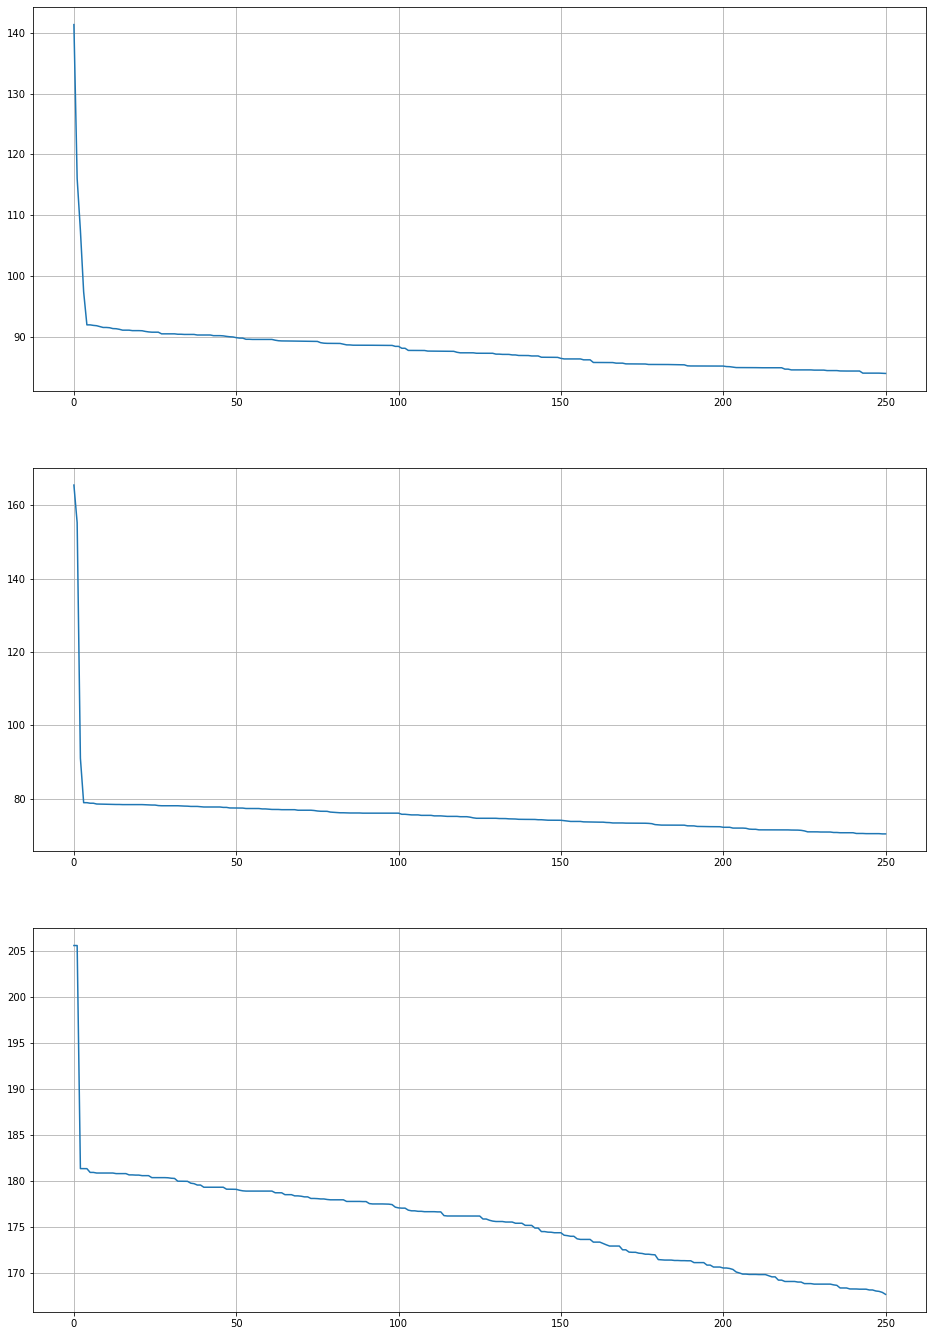

In [12]:
min_values = [GA_exe[1][i]['min'] for i in range(len(GA_exe[1]))]
ngen = [i for i in range(len(GA_exe[1]))]
min_values2 = [GA_exe2[1][i]['min'] for i in range(len(GA_exe2[1]))]
ngen2 = [i for i in range(len(GA_exe2[1]))]
min_values3 = [GA_exe3[1][i]['min'] for i in range(len(GA_exe3[1]))]
ngen3 = [i for i in range(len(GA_exe3[1]))]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,24))
ax1.plot(ngen, min_values)
ax2.plot(ngen2, min_values2)
ax3.plot(ngen3, min_values3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()